In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [ ]:
dados.shape

(7043, 18)

In [ ]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


##Diferentes variáveis


In [ ]:
#modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao':0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()



,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#trasnformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                         axis=1))
#junção dos dados trasnformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados_final.shape

(7043, 39)

In [ ]:
#A variável “Minutos totais por dia” pode ser classificada como quantitativa contínua.
#A variável “Churn” pode ser classificada como qualitativa nominal.

## Definição Formal

Informações para classificaçãtexto:
X = inputs(dados de entrada)
y = outputs(dados de saída)

In [ ]:
#Dica
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


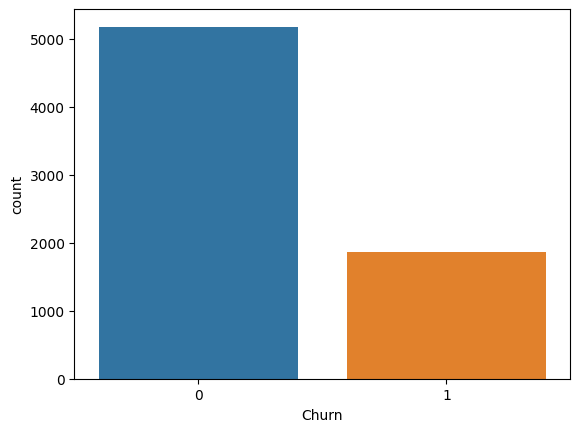

In [ ]:
#Dados desbalanceados

import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso.
Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de **Oversampling**,
que consiste em realizar a criação de novas observações da classe quando há menos amostras,
tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a **SMOTE**. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.



In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


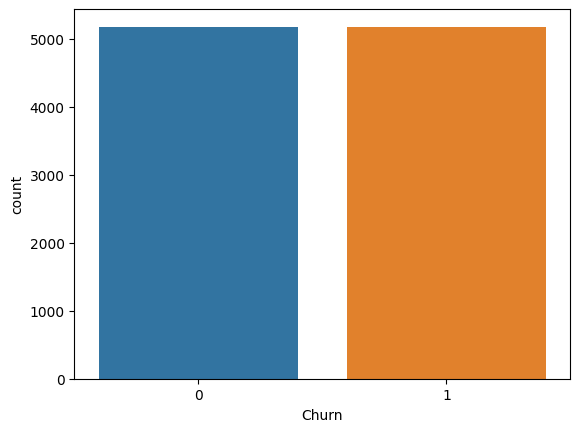

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

***KNN***

1.Receber as informações

2.Calcular as distâncias

3.ordenar da menor distância para a maior

4.Fazer uma contagen das classes

5.Classificar a partir dos K-vizinhos

6.Definir o churn

**Dados de treino**

Os dados de treino são aqueles utilizados para a criação e treinamento do modelo.

Normalmente a maioria dos dados, cerca de 70%, são utilizados para treinamento.


**Dados de teste**

Os dados de teste são utilizados para comprovar que o modelo realmente funciona.

Eles não são utilizados no treinamento do modelo e normalmente representam 30% da totalidade dos dados.

Além disso, no momento de realizar a separação desses dados é importante que ela seja feita de forma aleatória,

para garantirmos que não haverá nenhum padrão no momento de divisão dos dados.

Assim, cada amostra terá a mesma probabilidade de ser selecionada.



#Classificação é interferida pelo valor de K

K muito pequeno -> Overfitting

K muito grande -> Underfitting





In [ ]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis =1)
y = dados_final['Churn']

In [ ]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [ ]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

Distância Euclidiana:

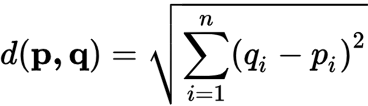

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

In [ ]:
b = X_normalizado[0]

In [ ]:
#1 - começamos subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [ ]:
#2 - depois realizamos a exponenciação
np.square(a - b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [ ]:
#3 - a soma
np.sum(np.square(a-b))

91.7112036526817

In [ ]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(91.7112036526817)

9.576596663360199

**Distância Euclidiana**

A medida de distância mais conhecida e mais utilizada é a **distância euclidiana**.

Ela consiste em subtrair as coordenadas de uma observação pela outra observação, elevar ao quadrado os resultados, somar todos os valores e extrair a raiz quadrada.

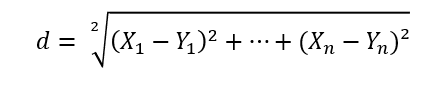

**Distância de Manhattan**
Uma distância que considera apenas a soma dos módulos das diferenças entre cada par de coordenadas.

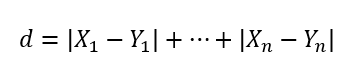

**Distância de Minkowski**
Uma medida de distância que é a generalização de outras distâncias, como a distância euclidiana e a de Manhattan. Consiste em extrair o módulo da diferença entre cada par de coordenadas elevando o resultado a m, realizar a soma de todos os termos e, por fim, tirar a raiz m-ésima, em que m é um número qualquer. A distância euclidiana é um caso à parte quando m é igual a 2 e a distância de Manhattan é um caso à parte quando m é igual a 1.

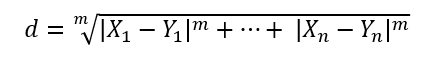

**Distância de Chebyshev**
É uma medida de distância que considera apenas o valor máximo entre os módulos das diferenças entre as variáveis. Dessa forma, leva em consideração apenas a variável que possui a maior diferença de valores entre as duas observações.

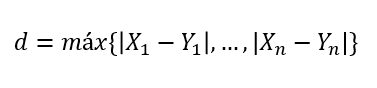

# **Implementando o modelo**

In [ ]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

# Treino Teste

In [ ]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instaciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
Knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
#treinando o modelo com os dados de treino
Knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#treinando o modelo com os dados de teste
predito_Knn = Knn.predict(x_teste)

In [ ]:
predito_Knn

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Calcule a distância da Maria com os(as) 10 primeiros(as) clientes da nossa base de dados normalizada utilizando a métrica euclidiana.
import numpy as np

In [ ]:
#podemos construir uma função para calcular todas as distâncias de uma vez.

def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [ ]:
#rodamos a função
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[9.576596663360199,
 9.164687977147782,
 8.497169420877166,
 10.037544220142902,
 7.8028994013625566,
 9.01167938964265,
 8.970041771751976,
 10.634917481179656,
 9.45035230511453,
 7.919985943117673]

O teorema de Bayes é uma fórmula utilizada para calcular a probabilidade de um evento ocorrer sabendo que um outro evento, chamado de condicionante, já ocorreu, denominado probabilidade condicional. Sua notação é dada por P(A|B), que significa a probabilidade de A dado que B já aconteceu e é definido pela seguinte equação:

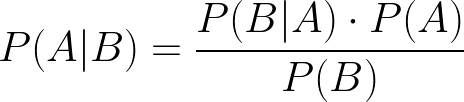


Onde:

P(B|A): probabilidade de B acontecer dado que A já aconteceu;
P(A): probabilidade de A acontecer;
P(B): probabilidade de B acontecer.
Falando dessa forma, pode ficar complicado de visualizar na prática o que isso realmente significa. Como o teorema de Bayes envolve probabilidade, pode ser aplicado a inúmeros contextos. Vamos utilizar aqui um exemplo envolvendo a área da saúde, mas o teorema poderia ser utilizado em outras áreas. Considere o exemplo:


Covid-19 (5%)	Sem Covid-19 (95%)
Teste positivo	85%	10%
Teste Negativo	15%	90%



Primeiramente, vamos entender o que está na tabela. Sabemos, através de pesquisas realizadas anteriormente, que há uma probabilidade de 5% de ter Covid-19. Consequentemente, há uma probabilidade 95% de não ter. Quem tem a doença está na coluna “Covid-19 (5%)” e possui uma probabilidade de 85% de testar positivo e 15% de negativo. Já quem não tem está na coluna “Sem Covid-19 (95%)” e possui uma probabilidade de 10% de testar positivo e 90% de negativo.

De posse dessas informações, vamos responder à pergunta: quais as chances de ter Covid-19 dado que o teste deu positivo?

Evento A: ter Covid-19
Evento B: positivo no teste (evento condicionante)
Utilizando a fórmula apresentada anteriormente, precisamos definir algumas probabilidades, como:

P(B|A): probabilidade do teste ser positivo dado que a pessoa tem Covid-19, que é de 85% ou 0.85, de acordo com a tabela.
P(A): probabilidade de ter covid-19. Observando a tabela, temos que é de 5%, ou 0.05.
P(B): a probabilidade do teste ser positivo.
A P(B) não conseguimos encontrar diretamente na tabela, pois a probabilidade do teste ser positivo pode acontecer quando a pessoa testada possui a doença ou não (chamado também de complementar). Logo, a probabilidade P(B) pode ser calculada como:


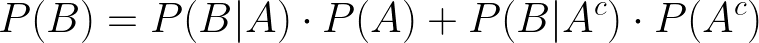

P(B|AC): probabilidade do teste ser positivo dado que a pessoa não possui Covid-19, que é 10% ou 0.1
P(AC): probabilidade da pessoa não ter Covid-19, que é 95% ou 0.95.
Novamente, as informações acima foram retiradas diretamente da tabela. Pronto, agora temos todas as informações que precisamos. Colocando na equação temos que:

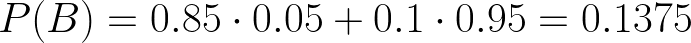

Jogando esses valores na primeira equação, temos que:

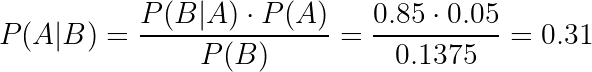

Logo, as chances de ter Covid-19, dado que o teste deu positivo, são de 31%.

# Treinamento e teste

In [ ]:
x_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

In [ ]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [ ]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(x_treino)

-0.4461759755508453

In [ ]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#criamos o modelo
bnb = BernoulliNB(binarize=0.44)

In [ ]:
bnb.fit(x_treino, y_treino)

BernoulliNB(binarize=0.44)

In [ ]:
predito_BNb = bnb.predict(x_teste)

In [ ]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])